# Import Required Libraries
Import the necessary libraries, including pandas, matplotlib, and seaborn.

In [1]:
# Install the missing pandas library

# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Load the Dataset
Use pandas to load the afl_vfl_dataset_clean.csv file.

In [2]:
afl_vfl_data = pd.read_csv('afl_vfl_dataset_clean.csv')

# Display the first few rows of the dataframe
afl_vfl_data.head()

num_rows = afl_vfl_data.shape[0]
print("Number of rows in the dataset:", num_rows)


Number of rows in the dataset: 137


# Initial Data Exploration
Perform initial data exploration to understand the structure and content of the dataset.

In [3]:
# Check the shape of the dataset
print("The dataset has {} rows and {} columns.".format(afl_vfl_data.shape[0], afl_vfl_data.shape[1]))

# Check the data types of the columns
print("\nData types of the columns:")
print(afl_vfl_data.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(afl_vfl_data.isnull().sum())

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(afl_vfl_data.describe())

# Check the unique values in each column
for col in afl_vfl_data.columns:
    print("\nUnique values in column '{}':".format(col))
    print(afl_vfl_data[col].unique())

The dataset has 137 rows and 24 columns.

Data types of the columns:
Year                           float64
Team_name_winner                object
Team_nickname_winner            object
Q1_Score_winner                 object
Total_Q1_Score_winner          float64
HalfTime_Score_winner           object
Total_HalfTime_Score_winner    float64
Q3_Score_winner                 object
Total_Q3_Score_winner          float64
FullTime_Score_winner           object
Total_FullTime_Score_winner    float64
Team_name_loser                 object
Team_nickname_loser             object
Q1_Score_loser                  object
Total_Q1_Score_loser           float64
HalfTime_Score_loser            object
Total_HalfTime_Score_loser     float64
 Q3_Score_loser                 object
 Total_Q3_Score_loser          float64
FullTime_Score_loser            object
Total_FullTime_Score_loser     float64
Venue                           object
Team_enter_exit                 object
Year_of_event                  flo

# Data Cleaning
Clean the data by handling missing values, outliers, and incorrect data types.

In [4]:
# Handling missing values
# Get a list of the columns
column_list = afl_vfl_data.columns.tolist()

# Print the list
print(column_list)
# If the dataset has missing values, we can either drop them or fill them with appropriate values

# Drop specified columns
afl_vfl_data = afl_vfl_data.drop(["Year_of_event", "Team_enter_exit", "Venue"], axis=1)

# Drop rows with null values in the 'Year' column
afl_vfl_data = afl_vfl_data.dropna(subset=['Year'])

# Check for missing values
missing_values = afl_vfl_data.isnull().sum()

# Print each column name and the number of missing values in that column
for column, num_missing in missing_values.items():
    print(f"Missing values in {column}: {num_missing}")

# Handling incorrect data types
# We will convert all numerical columns to float and all categorical columns to category data type
for col in afl_vfl_data.columns:
    if afl_vfl_data[col].dtype == 'object':
        afl_vfl_data[col] = afl_vfl_data[col].astype('category')
    else:
        afl_vfl_data[col] = afl_vfl_data[col].astype(float)

# Check the data types of the columns after cleaning
print("\nData types of the columns after cleaning:")
print(afl_vfl_data.dtypes)

# Checking that the number of rows in the dataset is the same as before cleaning (manual checking).
num_rows = afl_vfl_data.shape[0]
print("Number of rows in the dataset:", num_rows)




['Year', 'Team_name_winner', 'Team_nickname_winner', 'Q1_Score_winner', 'Total_Q1_Score_winner', 'HalfTime_Score_winner', 'Total_HalfTime_Score_winner', 'Q3_Score_winner', 'Total_Q3_Score_winner', 'FullTime_Score_winner', 'Total_FullTime_Score_winner', 'Team_name_loser', 'Team_nickname_loser', 'Q1_Score_loser', 'Total_Q1_Score_loser', 'HalfTime_Score_loser', 'Total_HalfTime_Score_loser', '\xa0Q3_Score_loser\xa0', '\xa0Total_Q3_Score_loser\xa0', 'FullTime_Score_loser', 'Total_FullTime_Score_loser', 'Venue', 'Team_enter_exit', 'Year_of_event']
Missing values in Year: 0
Missing values in Team_name_winner: 0
Missing values in Team_nickname_winner: 0
Missing values in Q1_Score_winner: 1
Missing values in Total_Q1_Score_winner: 1
Missing values in HalfTime_Score_winner: 1
Missing values in Total_HalfTime_Score_winner: 1
Missing values in Q3_Score_winner: 1
Missing values in Total_Q3_Score_winner: 1
Missing values in FullTime_Score_winner: 1
Missing values in Total_FullTime_Score_winner: 1
Mi

# Exploratory Data Analysis
Perform exploratory data analysis to understand the relationships between different variables in the dataset.

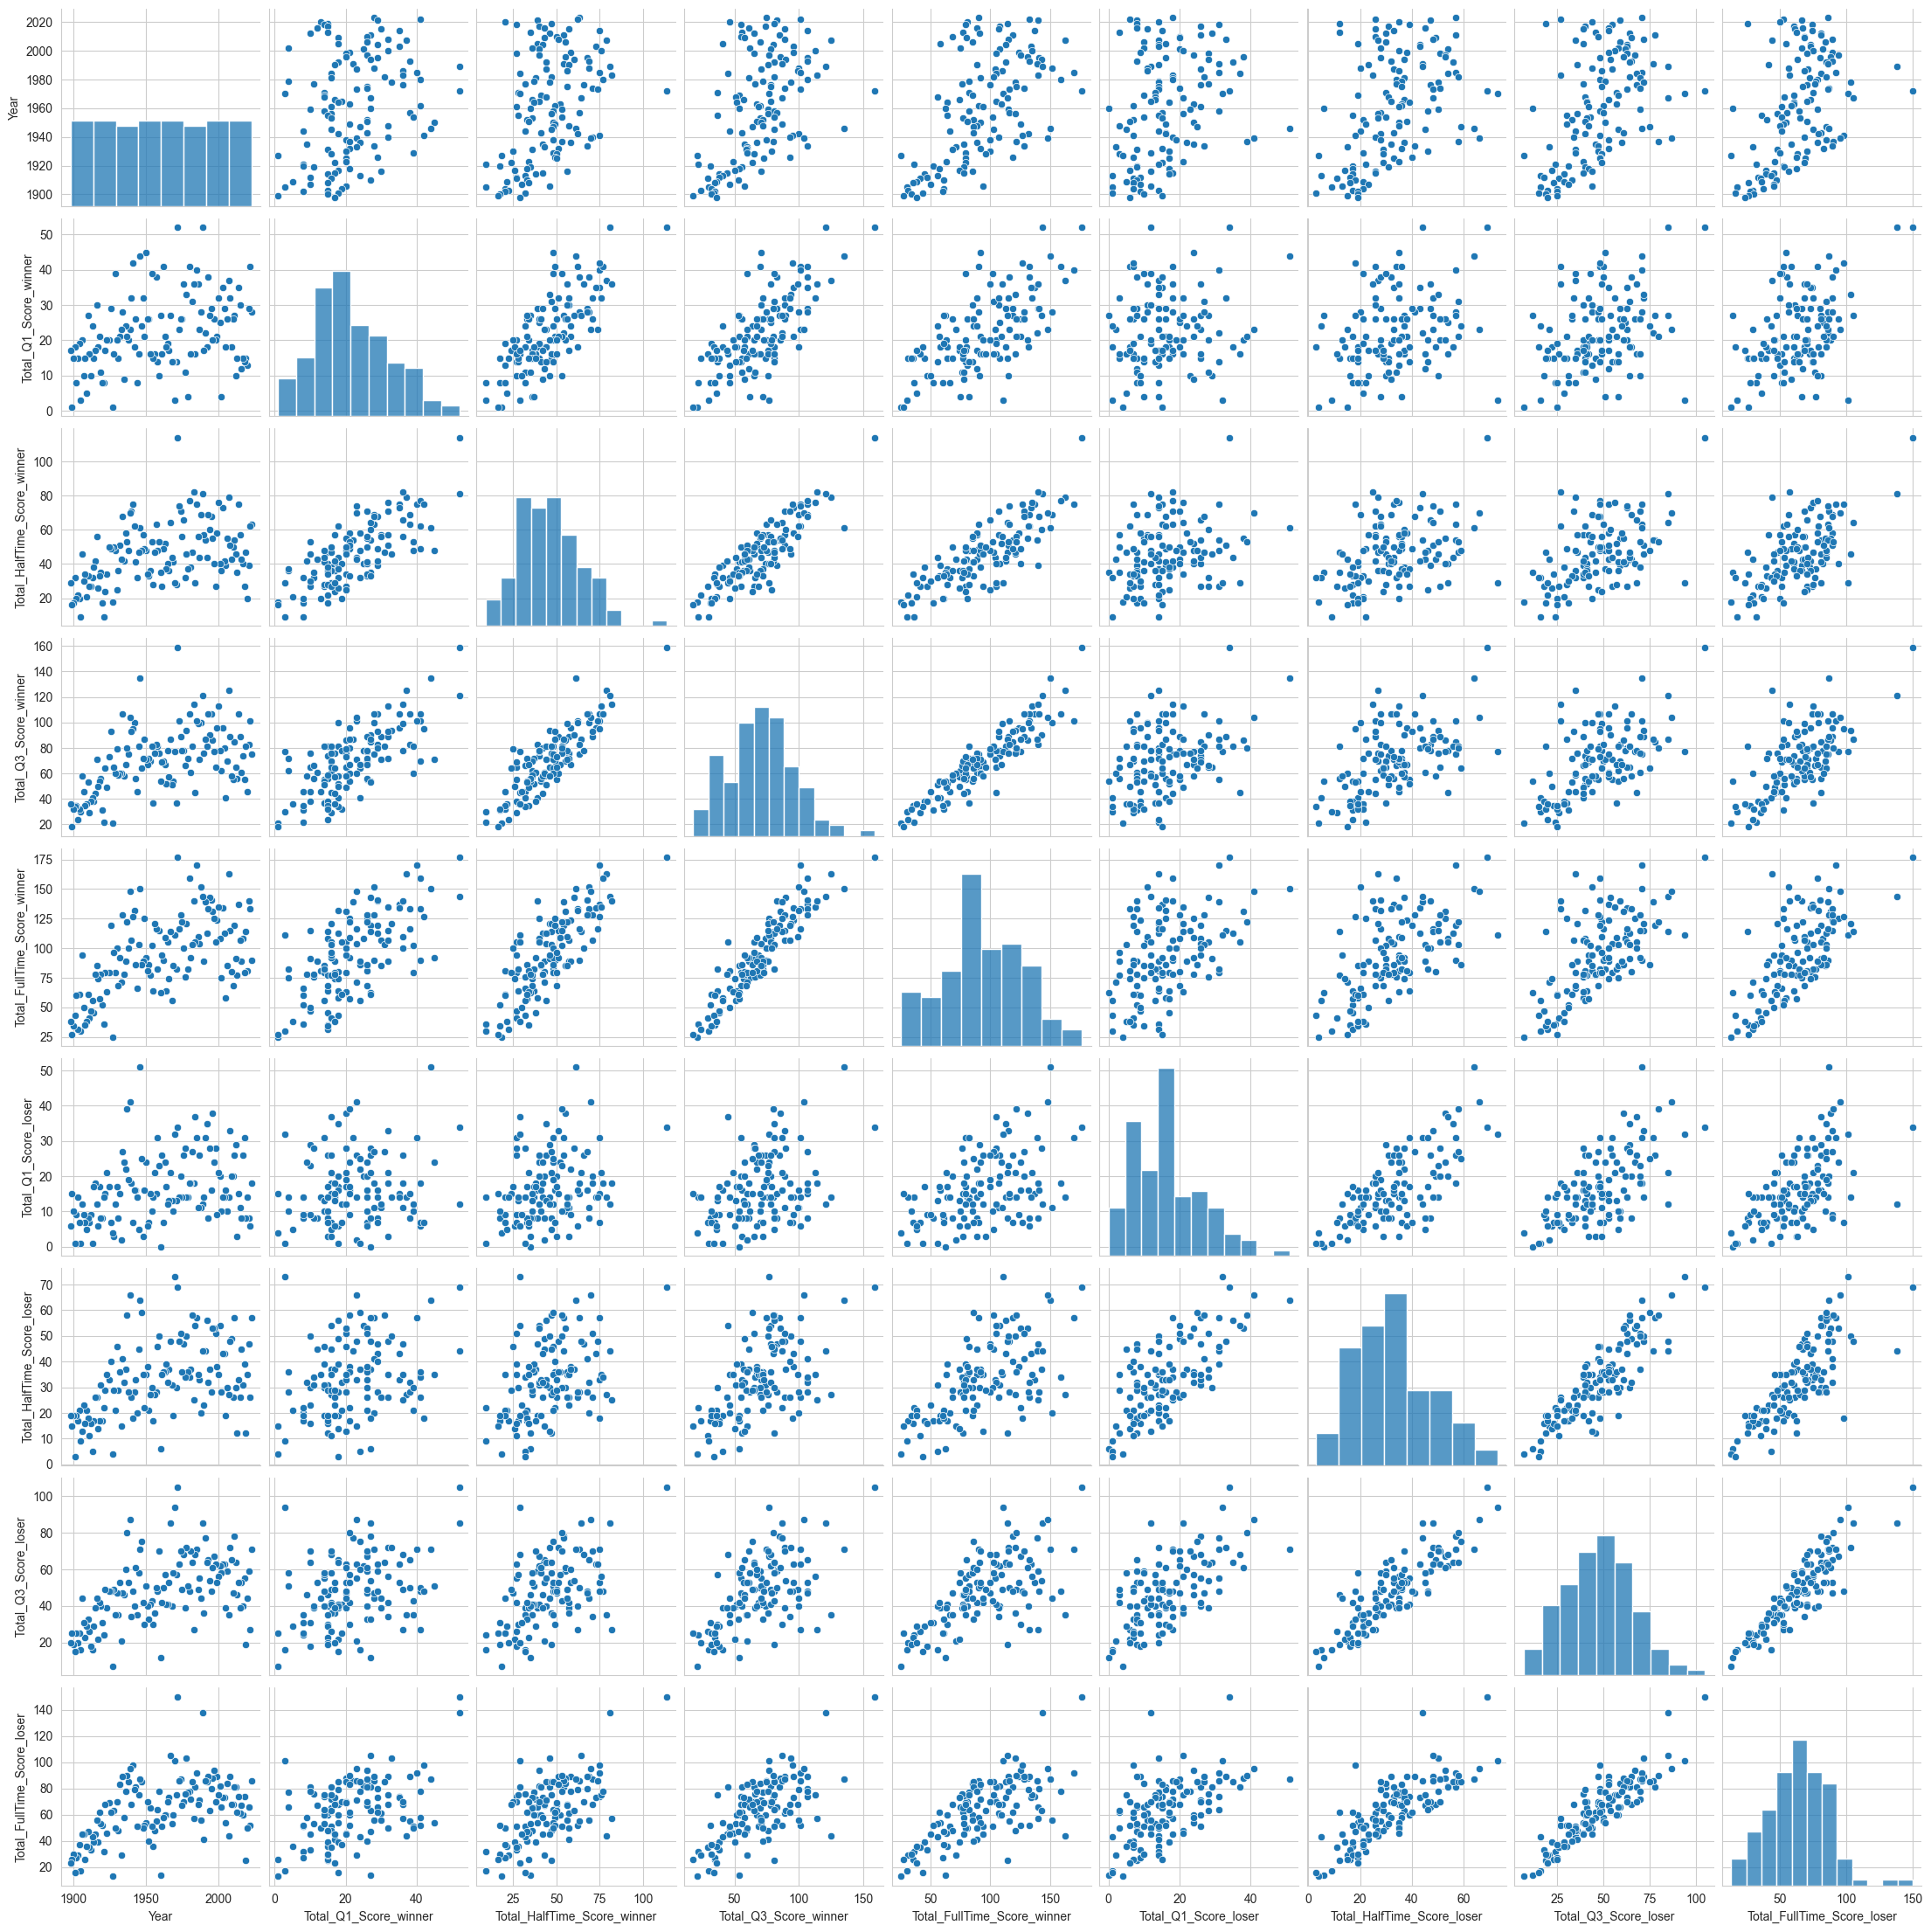

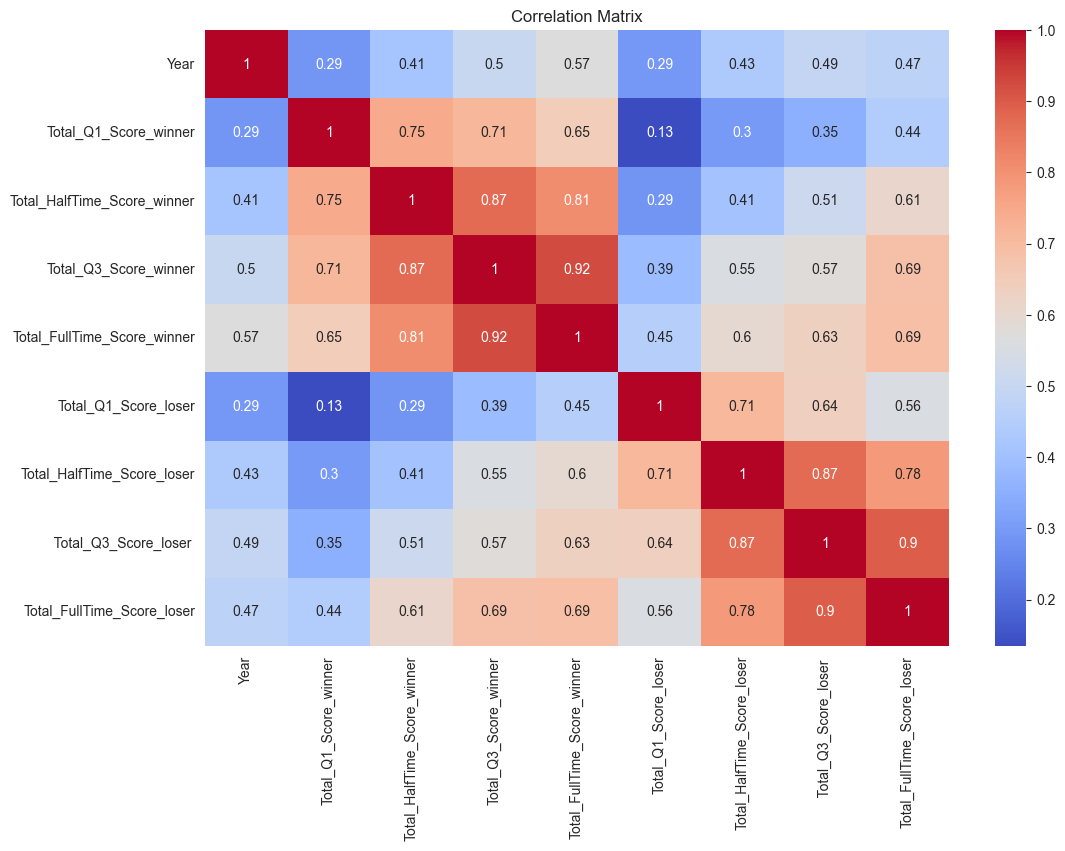

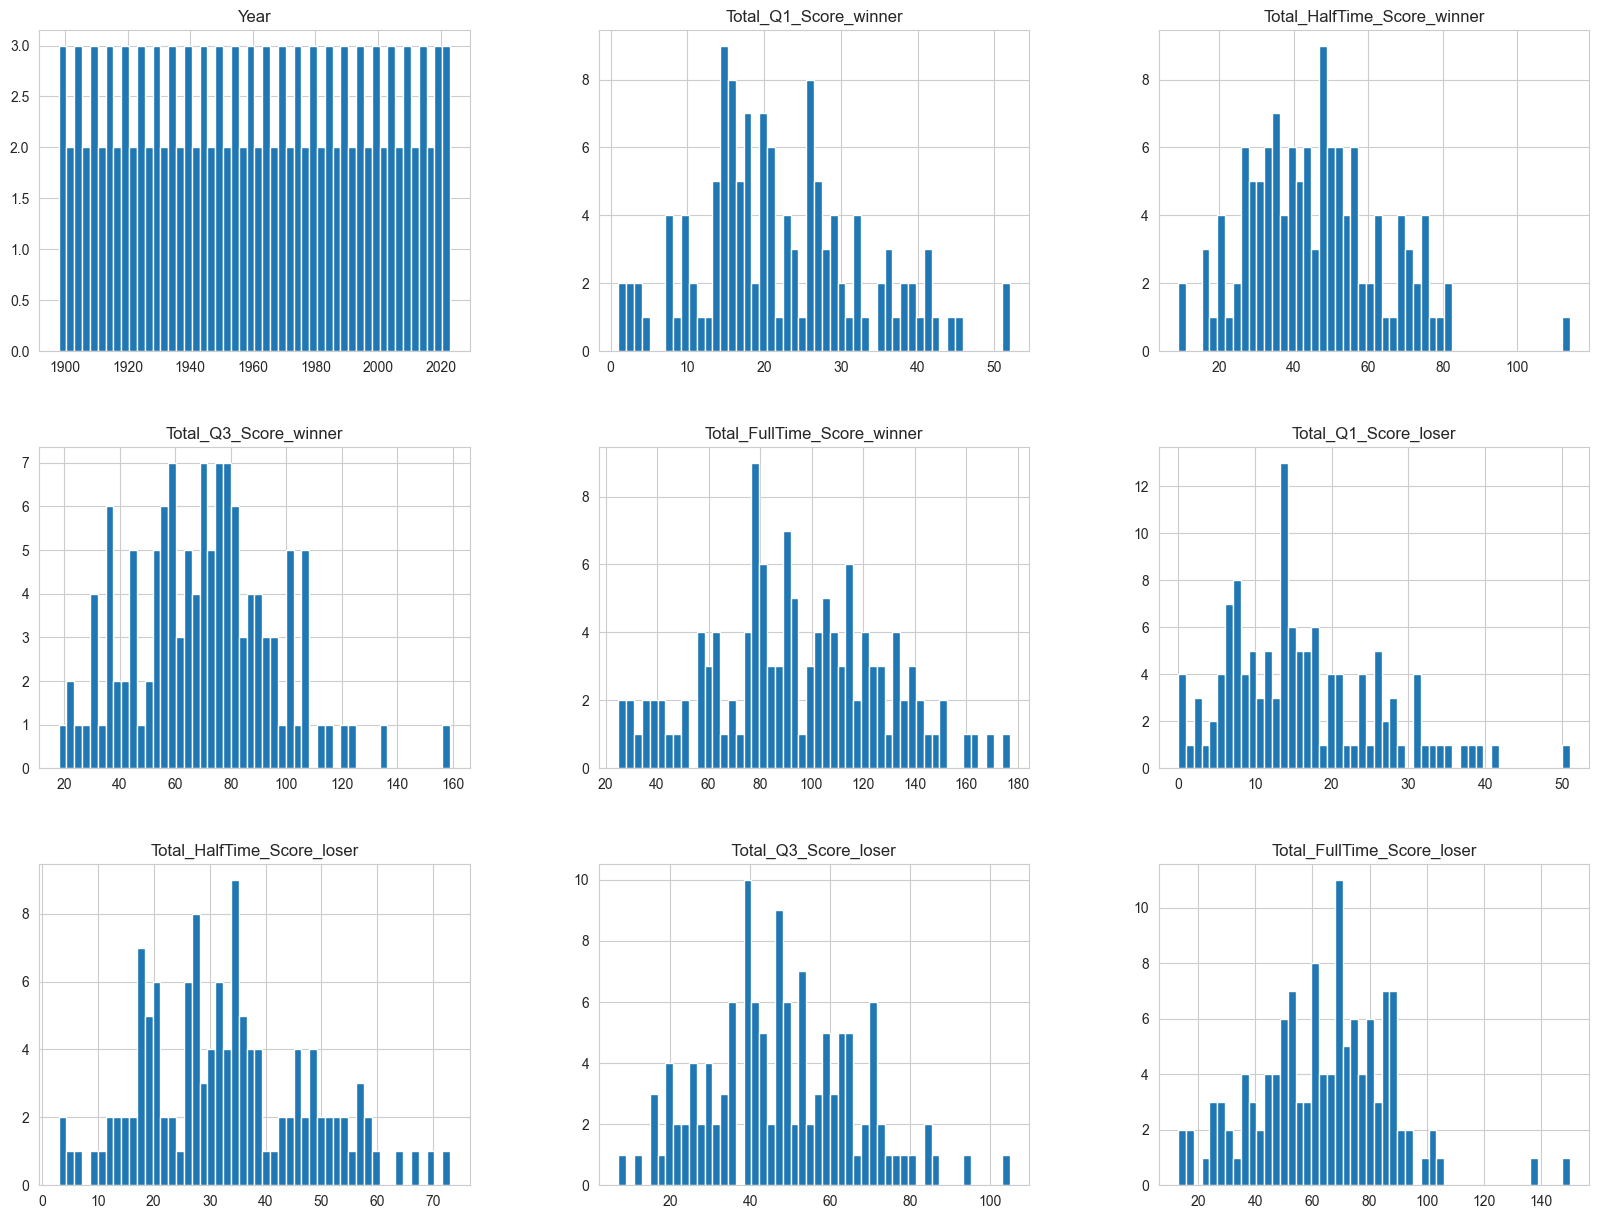

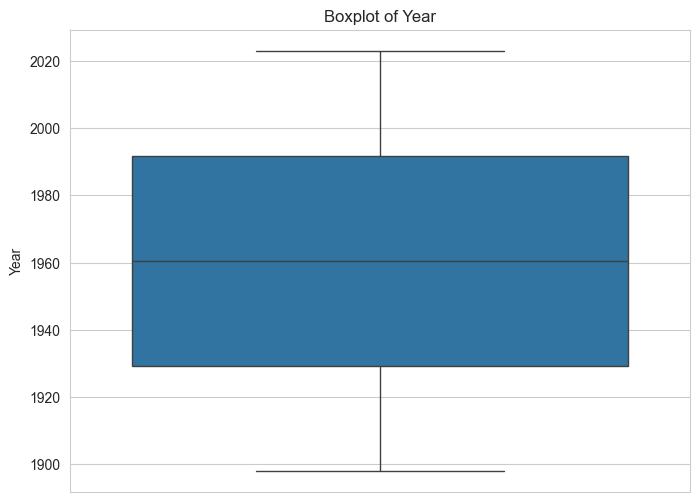

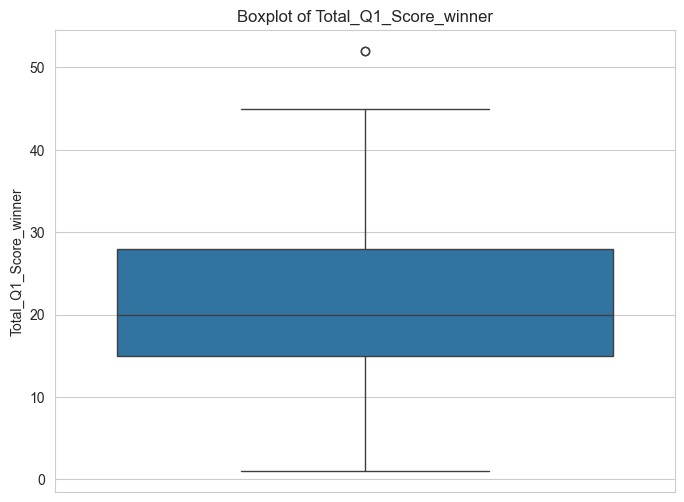

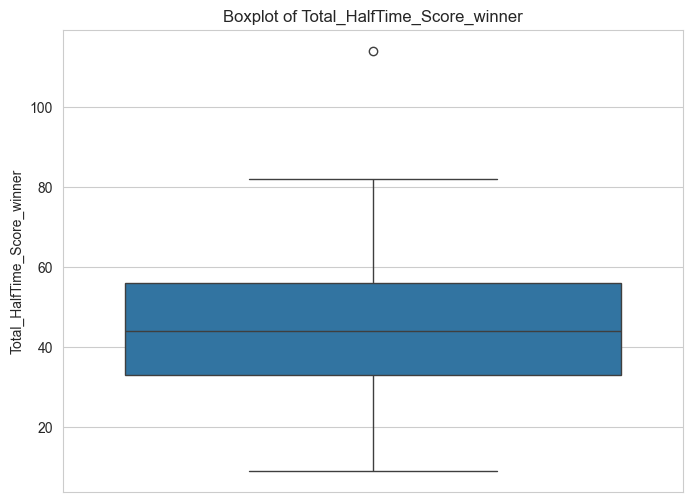

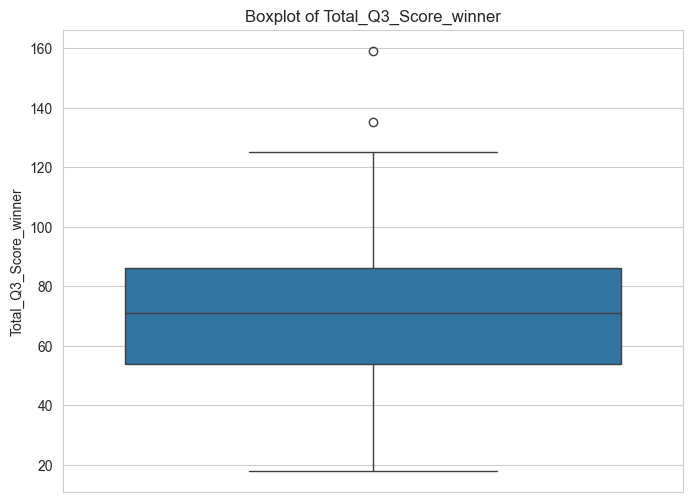

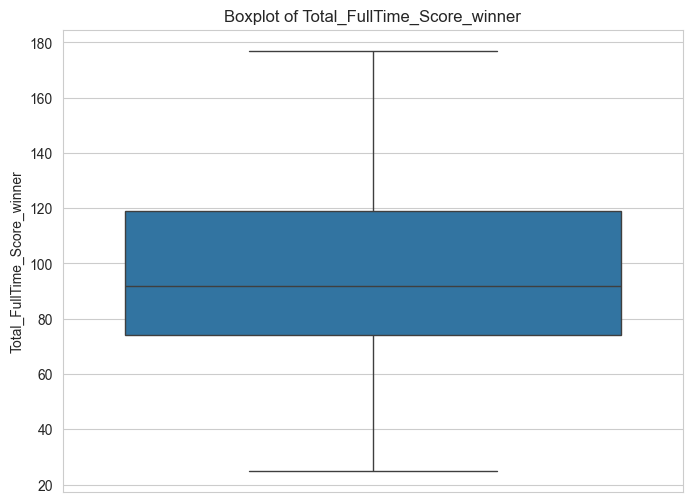

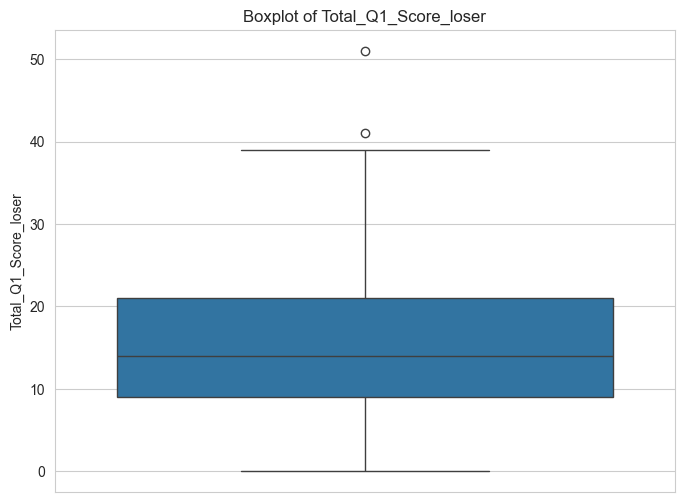

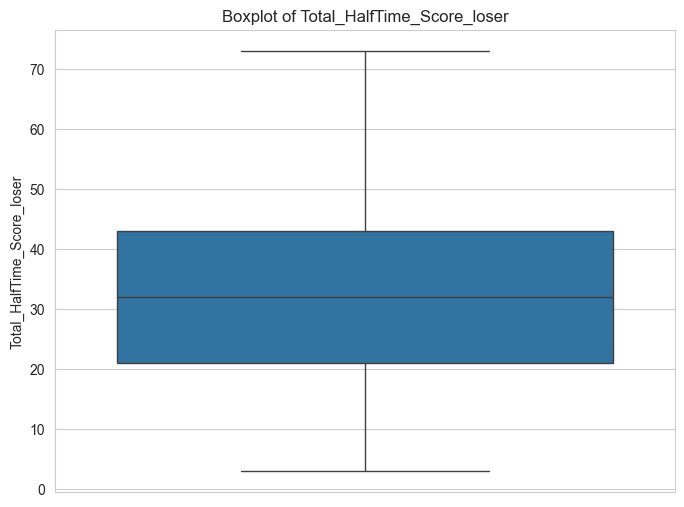

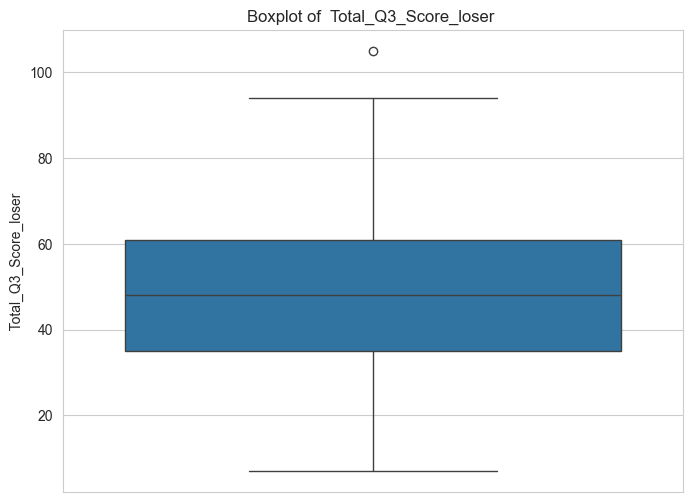

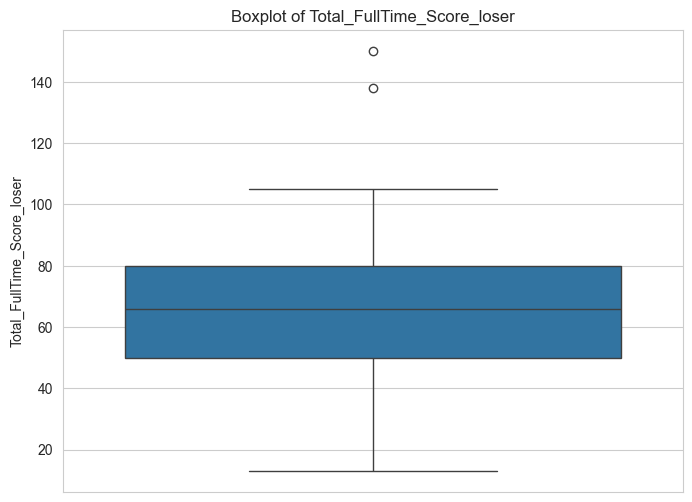

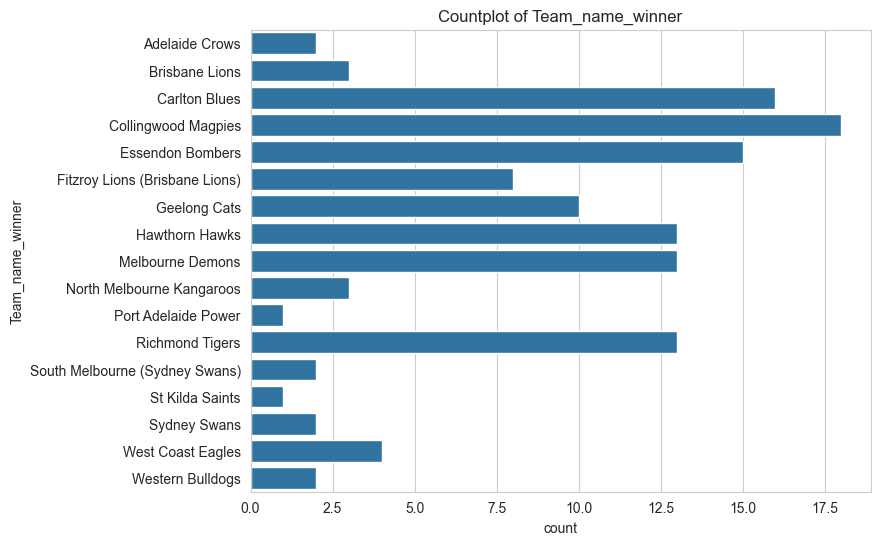

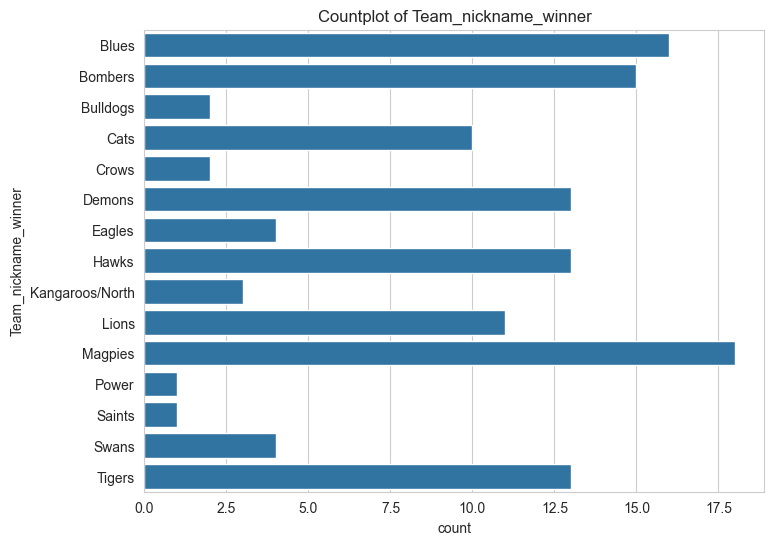

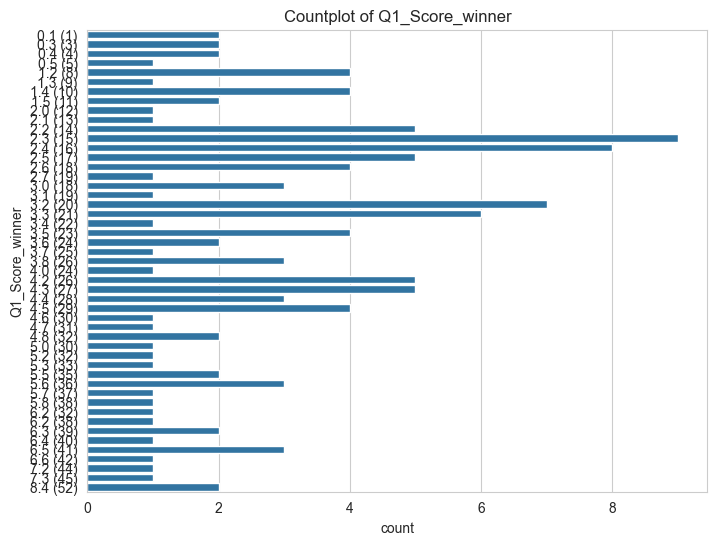

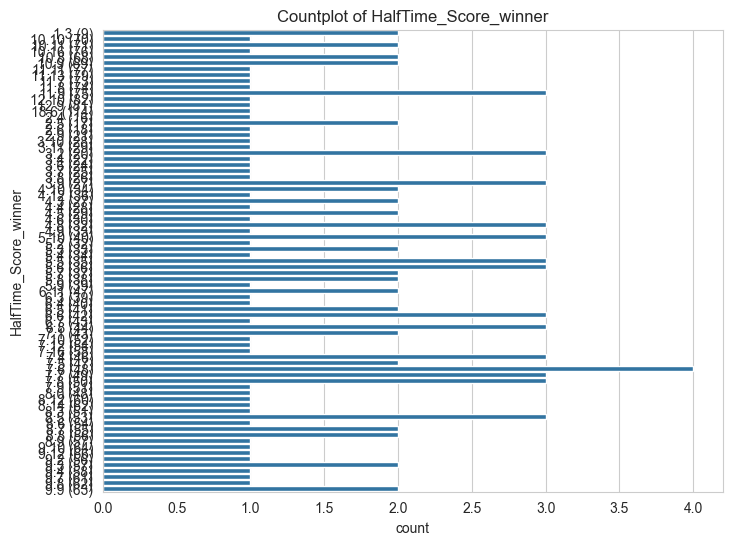

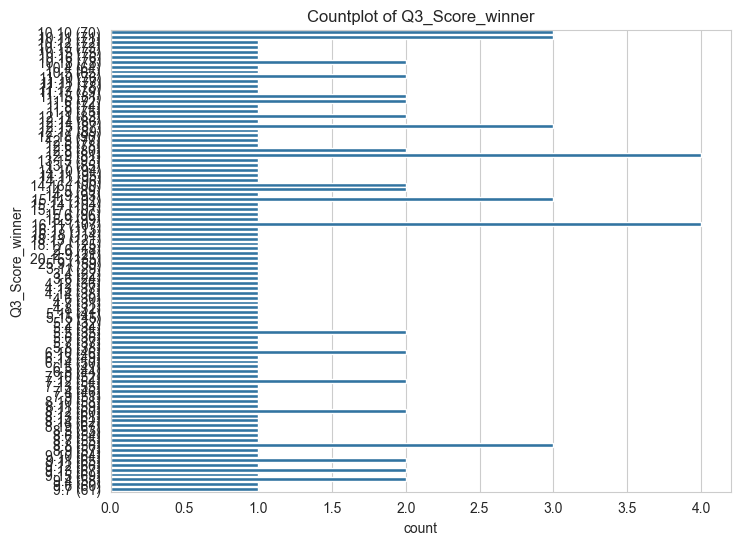

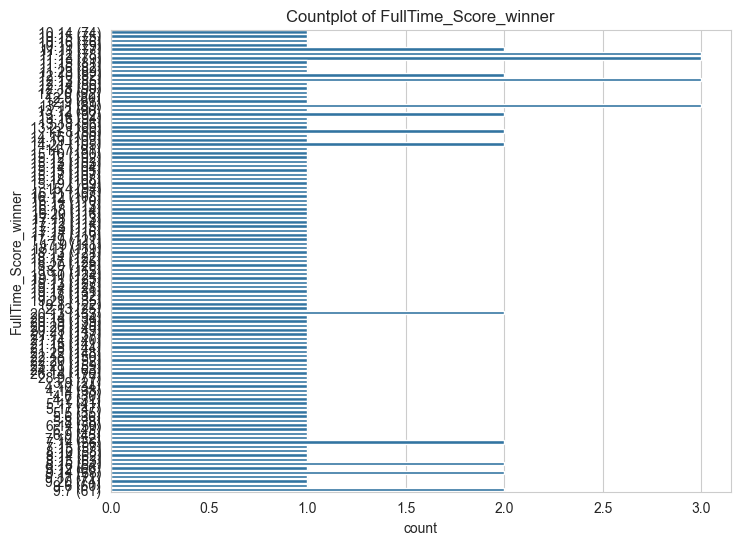

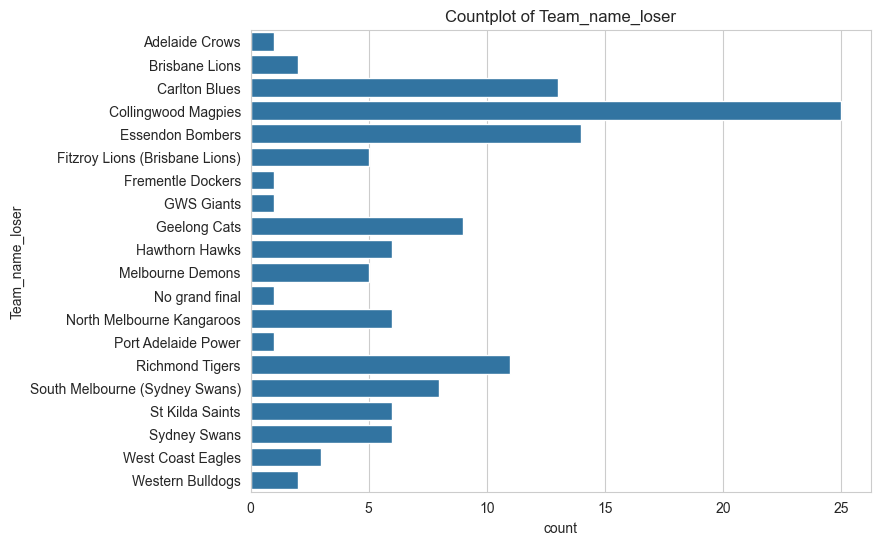

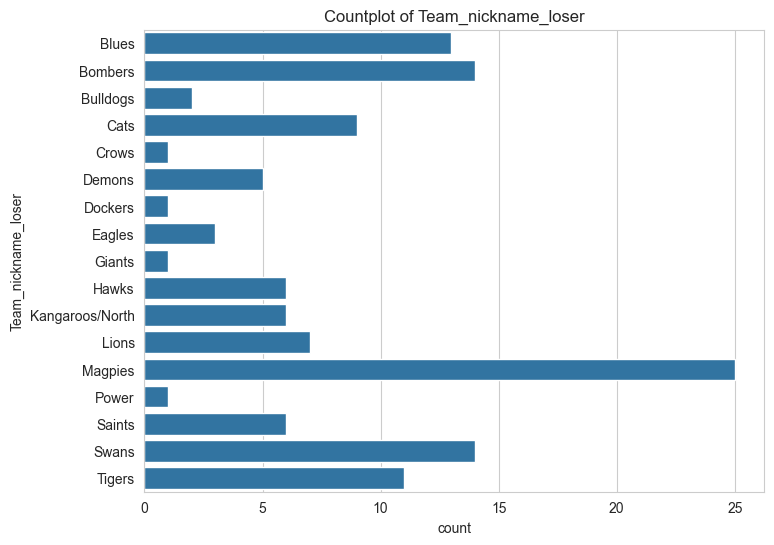

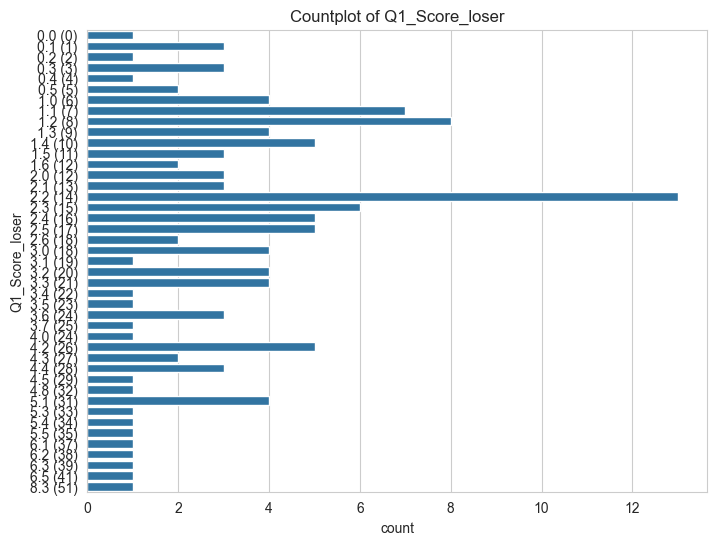

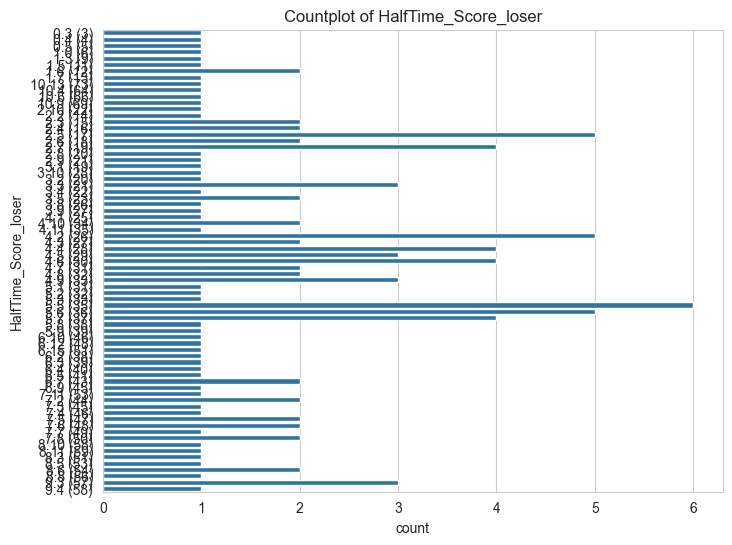

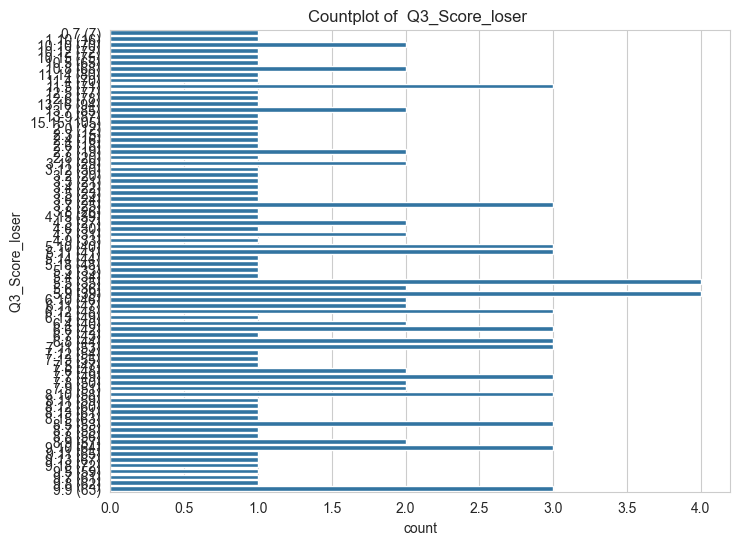

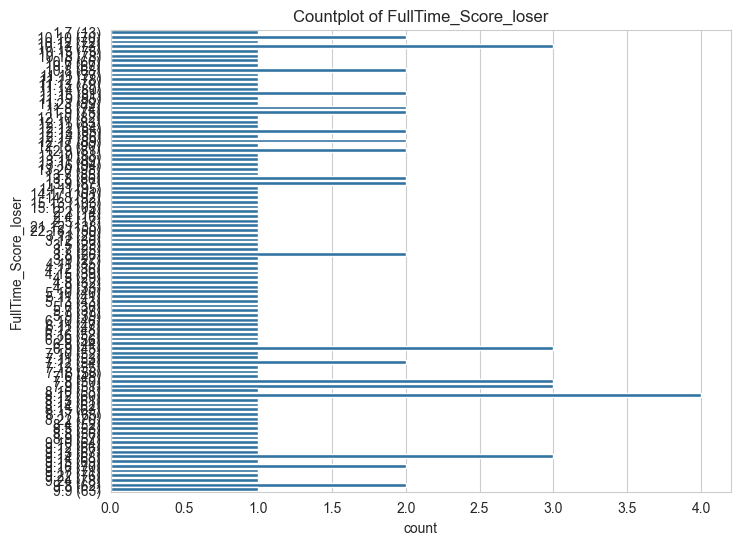

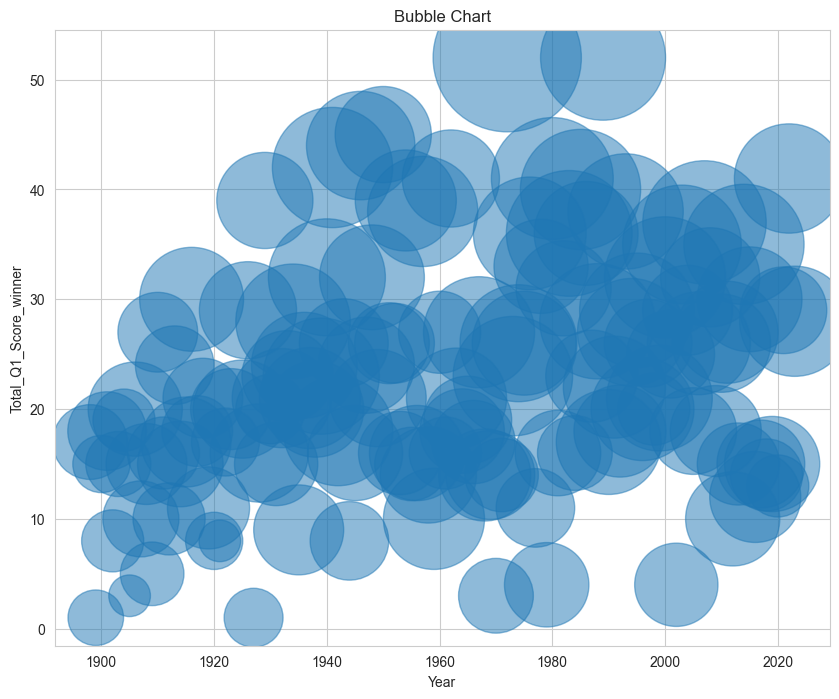

In [5]:
# Importing additional libraries for exploratory data analysis
import numpy as np

# Pairplot to visualize the relationships between different variables
sns.pairplot(afl_vfl_data)
plt.show()

# Correlation matrix to quantify the linear relationships between variables
# Select only numeric columns
numeric_columns = afl_vfl_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histograms to visualize the distribution of numerical variables
afl_vfl_data.hist(bins=50, figsize=(20,15))
plt.show()

# Boxplots to visualize the distribution and outliers in numerical variables
for col in afl_vfl_data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(afl_vfl_data[col])
    plt.title('Boxplot of {}'.format(col))
    plt.show()

# Countplots to visualize the distribution of categorical variables
for col in afl_vfl_data.select_dtypes(include=['category']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(afl_vfl_data[col])
    plt.title('Countplot of {}'.format(col))
    plt.show()

# Bubble chart to visualize the relationships between three variables
# For simplicity, we will use the first three numerical columns
num_cols = afl_vfl_data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
plt.scatter(afl_vfl_data[num_cols[0]], afl_vfl_data[num_cols[1]], s=afl_vfl_data[num_cols[2]]*100, alpha=0.5)
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.title('Bubble Chart')
plt.show()


# Visualize Data with a Bubble Chart
Use matplotlib or seaborn to visualize a bubble chart where the teams that have won the most are represented as bigger.

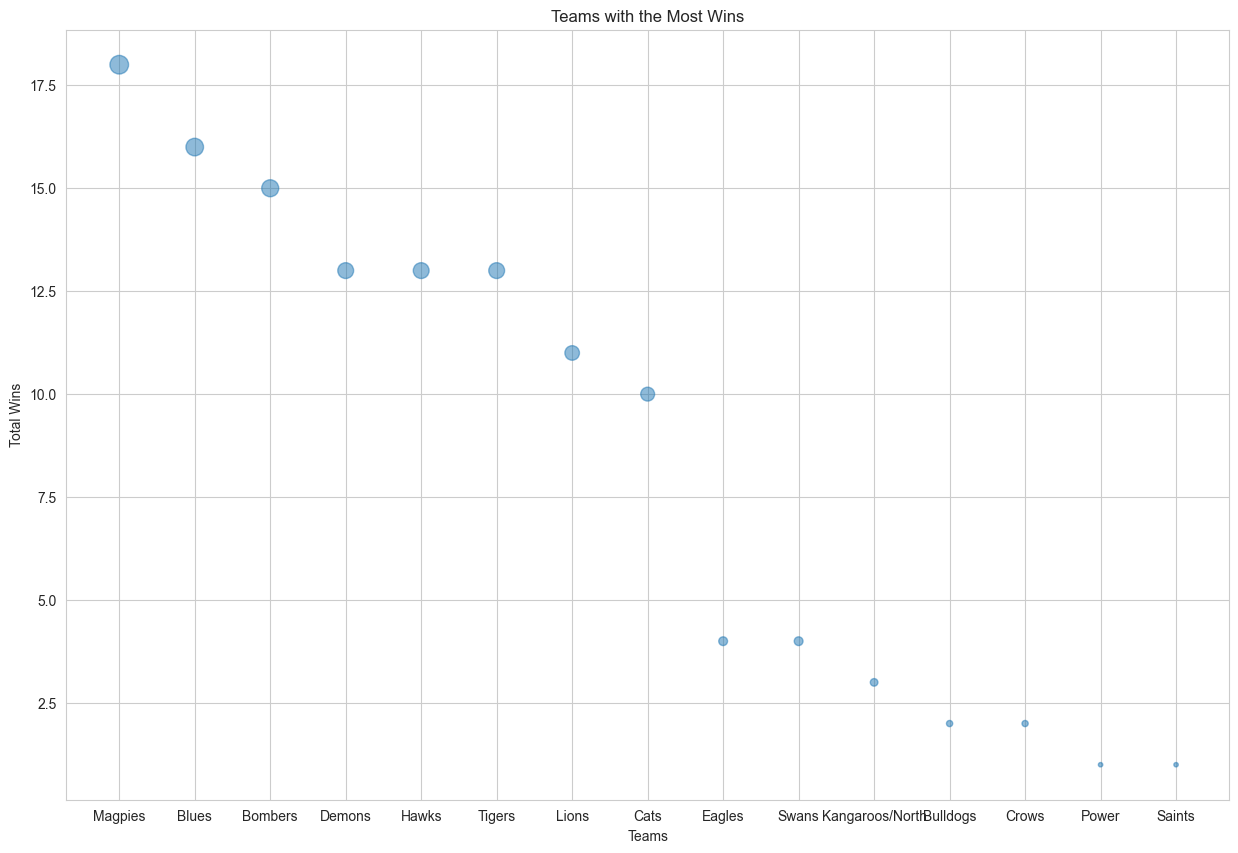

C:\Users\fynnh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\plotly\express\_core.py:1706: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)


In [6]:
#'Team_nickname_winner' is the column containing the team nicknames for winner in each year. We can use this column to find the total wins for each team.
team_wins = afl_vfl_data['Team_nickname_winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Total_Wins']


# Create a bubble chart using matplotlib
plt.figure(figsize=(15,10))

# The size of each bubble is proportional to the number of wins
bubble_sizes = team_wins['Total_Wins']

# Create the scatter plot, where the size of each point is determined by the number of wins
plt.scatter(team_wins['Team'], team_wins['Total_Wins'], s=bubble_sizes*10, alpha=0.5)

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Total Wins')
plt.title('Teams with the Most Wins')

# Show the plot
plt.show()

import plotly.express as px

# Assuming df is your DataFrame and 'category' and 'value' are column names
fig = px.treemap(team_wins, path=['Team'], values='Total_Wins')

fig.show()